In [41]:
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.optimize

In [2]:
list_one = [1.0,'one',1]

list_two = []

list_two.append(1.0)

print(list_two)


[1.0]


In [3]:
list_two.append(1.0)
print(list_two)

[1.0, 1.0]


In [4]:
array_one = np.array([1.0,2.0,3.0])
print(array_one)


[1. 2. 3.]


In [5]:
A = [1.0,2.0,3.0,4.0,5.0]
B = []

for ii in A:
    B.append(ii**2.0)
print(B)

[1.0, 4.0, 9.0, 16.0, 25.0]


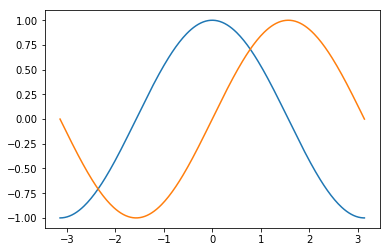

In [6]:
x = np.linspace(-np.pi,np.pi, 256)

C, S = np.cos(x), np.sin(x)

plt.plot(x,C)
plt.plot(x,S)
plt.show()

In [7]:
original_data = np.linspace(0.0,100.0,101)
data_mask = (original_data>50.0)
print(original_data[data_mask])

[ 51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100.]


In [8]:
dataset = np.loadtxt('./star_dataset.txt')
print(dataset.shape)

(76916, 4)


In [9]:
x_position = dataset[:,0]
y_position = dataset[:,1]
V_band = dataset[:,2]
B_band = dataset[:,3]

mag = B_band - V_band


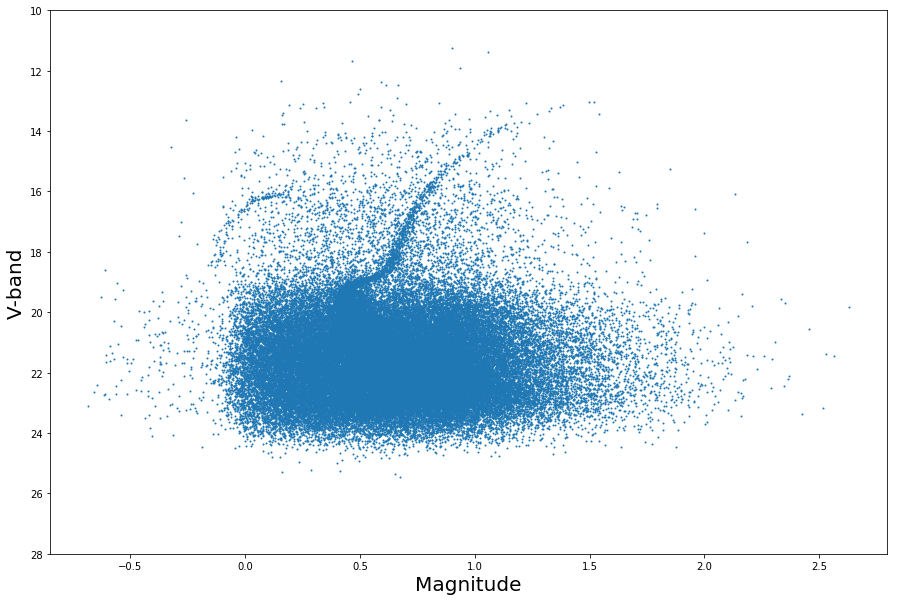

In [10]:
plt.figure(figsize = (15,10))
plt.scatter(mag, V_band,s=1)
plt.xlabel('Magnitude',size=20)
plt.ylabel('V-band',size=20)

plt.ylim([28.0,10.0])
plt.show()

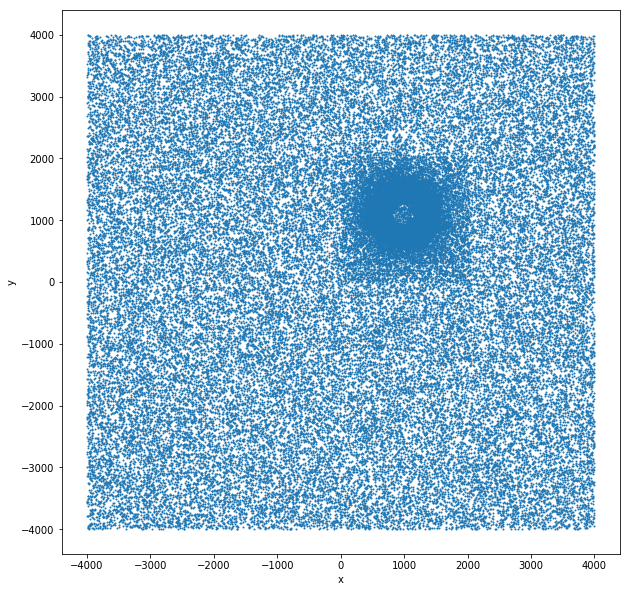

In [11]:
plt.figure(1,(10,10))
plt.scatter(x_position,y_position,s=1)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

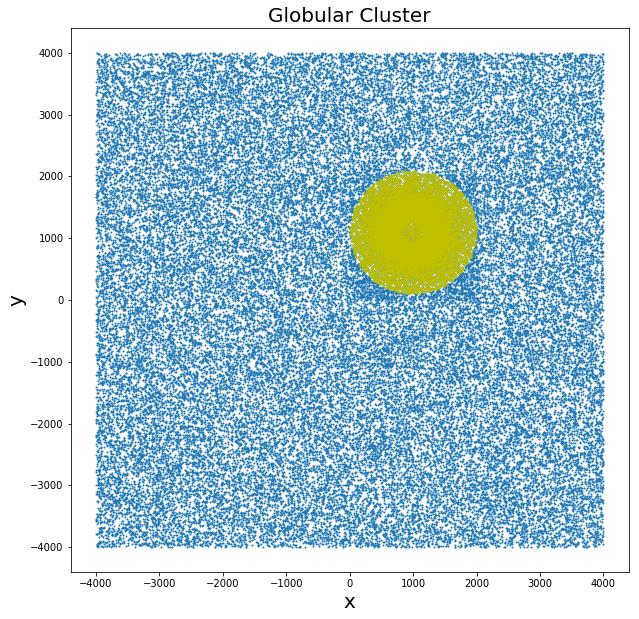

In [12]:
#percentage = dataset[:,10].astype(float)
#mask = (percentage>0.5)&(percentage<0.7)
#percentage[mask]
                      
#mask = (x_position>250.0)&(x_position<1800.0)&(y_position>400.00)&(y_position<1800.00)
circle_mask = ((x_position - 1000)**2 + (y_position-1100)**2 <= 650**2)

x_c, y_c = 1000.0,1100.0
distance = np.sqrt((x_position - x_c)**2 + (y_position-y_c)**2)
distance_mask = (distance<1000.0)

cluster_mask = ()


plt.figure(1,(10,10))
plt.scatter(x_position,y_position,s=1)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)

plt.scatter(x_position[distance_mask],y_position[distance_mask],color='y', s= 1)
plt.title('Globular Cluster',size=20)
plt.show()

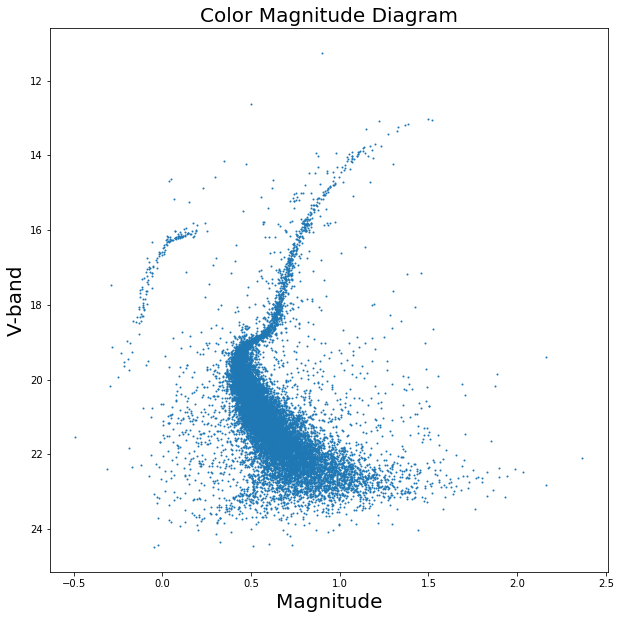

In [13]:
plt.figure(1,(10,10))

plt.scatter(B_band[circle_mask]-V_band[circle_mask], V_band[circle_mask],s=1)
plt.xlabel('Magnitude',size=20)
plt.ylabel('V-band',size=20)
plt.title('Color Magnitude Diagram',size=20)

#plt.ylim([28.0,10.0])
plt.gca().invert_yaxis()
plt.show()

In [16]:
haloMass_stellarMass_data = np.loadtxt('./haloMass_StellarMass.dat')
print(haloMass_stellarMass_data)

## first column = stellar massses, 2nd column = ratio of halo mass to stellar mass, 3rd column = uncertainty

[[1.00000000e+09 1.62584320e+02 2.63371960e+01]
 [1.93069773e+09 1.07727686e+02 2.38704761e+01]
 [3.72759372e+09 1.00362990e+02 2.16549553e+01]
 [7.19685673e+09 1.19226017e+02 1.97128987e+01]
 [1.38949549e+10 7.14723235e+01 1.81706310e+01]
 [2.68269580e+10 1.34050872e+02 1.74708165e+01]
 [5.17947468e+10 1.00452966e+02 1.88465586e+01]
 [1.00000000e+11 1.66487512e+02 2.47334802e+01]
 [1.93069773e+11 1.59342503e+02 3.84952128e+01]
 [3.72759372e+11 2.79598081e+02 6.49177341e+01]
 [7.19685673e+11 6.57861044e+02 1.12395544e+02]
 [1.38949549e+12 1.48959910e+03 1.96060842e+02]
 [2.68269580e+12 1.58586155e+03 3.42705282e+02]
 [5.17947468e+12 2.26744760e+03 5.99363203e+02]
 [1.00000000e+13 5.67752516e+03 1.04839187e+03]]


In [17]:
stellarMasses = haloMass_stellarMass_data[:,0]
haloMass_stellarMass = haloMass_stellarMass_data[:,1]
haloMass_stellarMass_uncertainty = haloMass_stellarMass_data[:,2]

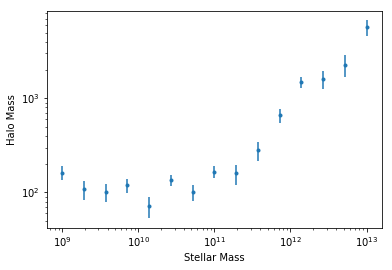

In [18]:
plt.errorbar(stellarMasses,haloMass_stellarMass,yerr=haloMass_stellarMass_uncertainty,fmt='.')
plt.loglog()
plt.xlabel('Stellar Mass')
plt.ylabel('Halo Mass')
plt.show()

In [22]:
### A*(xs)**alpha*(1+xs**2)**0.5
### where xs = (StellarMasses/m_o)
### three variables, A, alpha, m_o


In [19]:
def sm_hm(masses,A,alpha,m_o):
    xs = masses/m_o
    model_sm_hm = A*(xs)**alpha*(1+xs**2)**0.5
    return  model_sm_hm

In [20]:
start_mo = 10**8
start_A = 50
start_alpha = -0.2

In [21]:
model_sm_hm = sm_hm(stellarMasses,start_A,start_alpha,start_mo)
print model_sm_hm

[3.17052142e+02 5.34716017e+02 9.04209536e+02 1.53012253e+03
 2.58980441e+03 4.38359239e+03 7.41992277e+03 1.25594384e+04
 2.12589344e+04 3.59842849e+04 6.09093962e+04 1.03099301e+05
 1.74512744e+05 2.95391896e+05 5.00000000e+05]


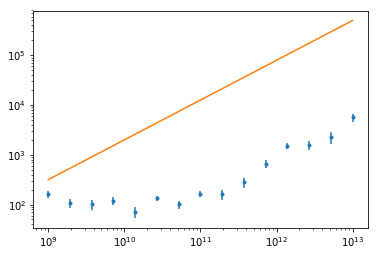

In [51]:
plt.errorbar(stellarMasses,haloMass_stellarMass,yerr=haloMass_stellarMass_uncertainty,fmt='.')
plt.loglog()
plt.plot(stellarMasses, model_sm_hm)
plt.show()

In [27]:
def xisquared(modelParameters, stellarMasses,dataY,dataYUncertainties):
    A,alpha,m_o = modelParameters
    modelys = sm_hm(stellarMasses,A,alpha,m_o)
    xisq = (dataY-modelys)**2/dataYUncertainties**2
    return xisq.sum()

In [48]:
startModelParameters = np.array([77,-0.15,6.5e10])
targs = (stellarMasses,haloMass_stellarMass,haloMass_stellarMass_uncertainty)

In [49]:
result = scipy.optimize.fmin(xisquared,startModelParameters,args=targs)

Optimization terminated successfully.
         Current function value: 22.389797
         Iterations: 136
         Function evaluations: 311


In [50]:
result

array([ 7.72190391e+01, -1.50376667e-01,  6.53805078e+10])